In [15]:
import pandas as pd
import numpy as np
import plotly.express as px

In [16]:
df = pd.read_csv('dataset_reformate2.csv')
df['date'] = pd.to_datetime(df['date'])
df[['nombre_total', 'entree_mensuelle']] = df[['nombre_total', 'entree_mensuelle']].astype(int)
df

pays       date  nombre_total  entree_mensuelle
0                   Albania 2014-02-01          1333                16
1                   Germany 2014-02-01        306716               445
2                   Andorra 2014-02-01            23                 0
3                   Austria 2014-02-01         41225               -37
4                   Belarus 2014-02-01          1143                39
...                     ...        ...           ...               ...
25795         Total Oceania 2024-10-01          4010                37
25796             Stateless 2024-10-01          1254               985
25797             Stateless 2024-10-01           272              -982
25798               Unknown 2024-10-01          1089                 2
25799  Total Unknown Origin 2024-10-01          2615                11

[25800 rows x 4 columns]

In [17]:
df_grouped = df.groupby(['pays', 'date']).sum().reset_index()
df_grouped

pays       date  nombre_total  entree_mensuelle
0      Afghanistan 2014-02-01          2437                43
1      Afghanistan 2014-03-01          2475                38
2      Afghanistan 2014-04-01          2496                21
3      Afghanistan 2014-05-01          2535                39
4      Afghanistan 2014-06-01          2567                32
...            ...        ...           ...               ...
25666     Zimbabwe 2024-06-01           251                -4
25667     Zimbabwe 2024-07-01           250                -1
25668     Zimbabwe 2024-08-01           249                -1
25669     Zimbabwe 2024-09-01           243                -6
25670     Zimbabwe 2024-10-01           245                 2

[25671 rows x 4 columns]

In [18]:
fig = px.line(df_grouped, x='date', y='entree_mensuelle', color='pays', title='Nombre total de migrants par pays')
fig.show()

In [19]:
import pandas as pd
import plotly.express as px

# Lire le fichier CSV dans un DataFrame
df = pd.read_csv('dataset_reformate2.csv')

# Filtrer les lignes où la colonne 'pays' contient le mot 'Total'
df_filtered = df[~df['pays'].str.contains('Total')]

# Calculer la moyenne de 'nombre_total' pour chaque 'pays' pour toutes les dates
df_mean = df_filtered.groupby('pays')['nombre_total'].mean().reset_index()

# Créer la carte choroplèthe avec la moyenne
fig = px.choropleth(df_mean,
                    locations='pays',
                    locationmode='country names',
                    color='nombre_total',
                    hover_name='pays',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Moyenne du nombre total d'immigrés par pays pour toutes les dates")

# Afficher la carte
fig.show()

Epoch 1/50


/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/ImmigrationProject_Python/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 0.0749 - val_loss: 0.0408
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0570 - val_loss: 0.0276
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0471 - val_loss: 0.0171
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0358 - val_loss: 0.0076
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0260 - val_loss: 0.0022
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0179 - val_loss: 0.0046
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0149 - val_loss: 0.0128
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0135 - val_loss: 0.0144
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0134 - val_loss: 0.0100
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0104 - val_loss: 0.0059
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0097 - val_loss: 0.0035
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0075 - val_loss: 0.0025
Epoch 13/50

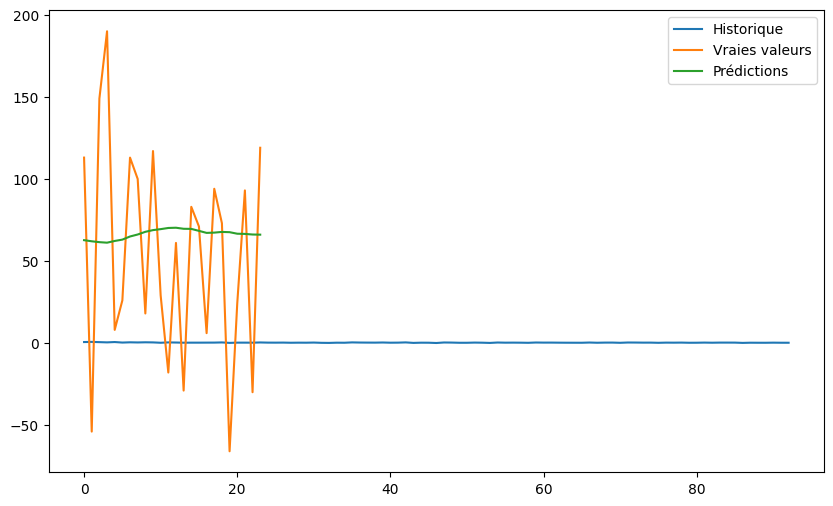

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Charger les données
data = pd.read_csv("dataset_reformate.csv")  # Remplacez par le chemin de votre fichier
data['date'] = pd.to_datetime(data['date'])
data = data.sort_values(by=['pays', 'date'])

data = data[data['pays'] == 'Kosovo']

# Prétraitement : normalisation
scalers = {}
for column in ['nombre_total', 'entree_mensuelle']:
    scaler = MinMaxScaler(feature_range=(0, 1))
    data[column] = scaler.fit_transform(data[[column]])
    scalers[column] = scaler

# Préparation des séquences
sequence_length = 12  # Utilisez les 12 derniers mois pour prédire le suivant
sequences = []
targets = []

countries = data['pays'].unique()
for country in countries:
    country_data = data[data['pays'] == country]
    for i in range(len(country_data) - sequence_length):
        seq = country_data.iloc[i:i+sequence_length][['nombre_total', 'entree_mensuelle']].values
        target = country_data.iloc[i+sequence_length]['entree_mensuelle']
        sequences.append(seq)
        targets.append(target)

sequences = np.array(sequences)
targets = np.array(targets)

# Division en ensembles d'entraînement et de test
train_size = int(0.8 * len(sequences))
X_train, X_test = sequences[:train_size], sequences[train_size:]
y_train, y_test = targets[:train_size], targets[train_size:]

# Construction du modèle LSTM
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, 2), return_sequences=True),
    LSTM(50, activation='relu'),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Entraînement
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Évaluation
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Prédictions
y_pred = model.predict(X_test)

# Denormaliser les prédictions pour obtenir des valeurs réelles
y_pred = scalers['entree_mensuelle'].inverse_transform(y_pred)
y_test = scalers['entree_mensuelle'].inverse_transform(y_test.reshape(-1, 1))

# Visualisation (facultative)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_train, label='Historique')
plt.plot(y_test, label='Vraies valeurs')
plt.plot(y_pred, label='Prédictions')
plt.legend()
plt.show()

Epoch 1/50


/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/ImmigrationProject_Python/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



594/594 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0599
Epoch 2/50
594/594 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0234
Epoch 3/50
594/594 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0231
Epoch 4/50
594/594 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0214
Epoch 5/50
594/594 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0209
Epoch 6/50
594/594 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0216
Epoch 7/50
594/594 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0214
Epoch 8/50
594/594 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0215
Epoch 9/50
594/594 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0212
Epoch 10/50
594/594 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0211
Epoch 11/50
594/594 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0208
Epoch 12/50
594/594 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0209
Epoch 13/50
594/594 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0210
Epoch 14/50
594/594 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0217
Epoch 15/50
594/594 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0208


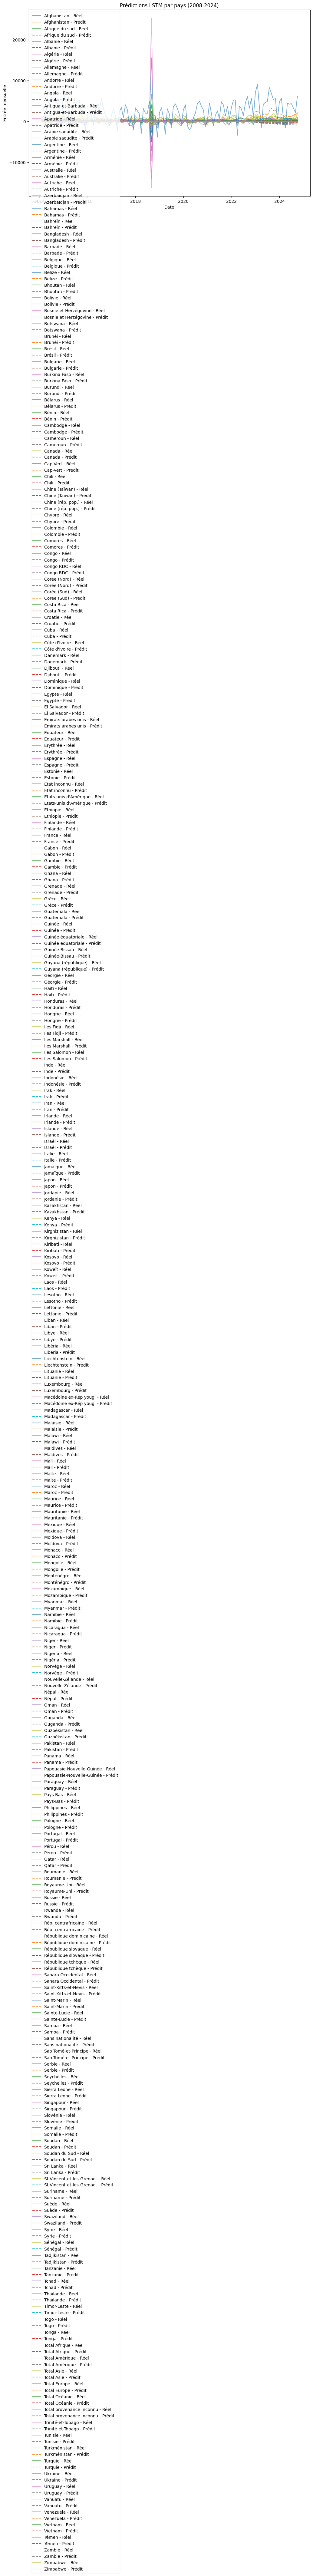

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Charger les données
data = pd.read_csv("dataset_reformate.csv")  # Remplacez par votre fichier
data['date'] = pd.to_datetime(data['date'])
data = data.sort_values(by=['pays', 'date'])

# Séparer données d'entraînement et de test
train_data = data[(data['date'] >= "2008-01-01") & (data['date'] <= "2022-12-31")]
test_data = data[(data['date'] >= "2023-01-01") & (data['date'] <= "2024-12-31")]

# Normalisation
scalers = {}
train_data_normalized = pd.DataFrame()
for country in train_data['pays'].unique():
    country_data = train_data[train_data['pays'] == country]
    scaler = MinMaxScaler(feature_range=(0, 1))
    country_normalized = pd.DataFrame(scaler.fit_transform(country_data[['nombre_total', 'entree_mensuelle']]),
                                      columns=['nombre_total', 'entree_mensuelle'])
    country_normalized['date'] = country_data['date'].values
    country_normalized['pays'] = country
    train_data_normalized = pd.concat([train_data_normalized, country_normalized])
    scalers[country] = scaler

# Création des séquences
def create_sequences(data, sequence_length):
    sequences, targets = [], []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length, :])
        targets.append(data[i+sequence_length, 1])  # La deuxième colonne est `entree_mensuelle`
    return np.array(sequences), np.array(targets)

sequence_length = 12
X_train, y_train = [], []
for country in train_data_normalized['pays'].unique():
    country_data = train_data_normalized[train_data_normalized['pays'] == country]
    country_sequences, country_targets = create_sequences(country_data[['nombre_total', 'entree_mensuelle']].values, sequence_length)
    X_train.append(country_sequences)
    y_train.append(country_targets)

X_train = np.concatenate(X_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

# Construction du modèle LSTM
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, 2)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Entraînement
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Prédictions pour 2023-2024
predictions = {}
for country in test_data['pays'].unique():
    country_test = test_data[test_data['pays'] == country]
    country_train = train_data[train_data['pays'] == country]
    full_data = pd.concat([country_train, country_test])
    
    scaler = scalers[country]
    normalized_full = scaler.transform(full_data[['nombre_total', 'entree_mensuelle']])
    
    test_start = len(country_train) - sequence_length
    inputs = normalized_full[test_start:test_start+sequence_length, :]
    pred_sequence = []
    
    for _ in range(len(country_test)):
        pred = model.predict(inputs.reshape(1, sequence_length, 2))
        pred_sequence.append(pred[0, 0])
        inputs = np.append(inputs[1:], [[inputs[-1, 0], pred[0, 0]]], axis=0)
    
    pred_sequence = scaler.inverse_transform([[0, x] for x in pred_sequence])[:, 1]
    predictions[country] = pred_sequence

# Visualisation
plt.figure(figsize=(12, 8))
for country in predictions:
    country_data = pd.concat([train_data[train_data['pays'] == country], test_data[test_data['pays'] == country]])
    dates = country_data['date']
    true_values = country_data['entree_mensuelle'].values
    plt.plot(dates, true_values, label=f'{country} - Réel', alpha=0.6)
    plt.plot(test_data[test_data['pays'] == country]['date'], predictions[country], linestyle='--', label=f'{country} - Prédit')

plt.xlabel('Date')
plt.ylabel('Entrée mensuelle')
plt.title('Prédictions LSTM par pays (2008-2024)')
plt.legend(loc='best')
plt.show()

In [22]:
df = pd.read_csv('dataset_reformate.csv')
df['date'] = pd.to_datetime(df['date'])
df[['nombre_total', 'entree_mensuelle']] = df[['nombre_total', 'entree_mensuelle']].astype(int)
df

pays       date  nombre_total  entree_mensuelle
0                       Albanie 2014-02-01          1333                16
1                     Allemagne 2014-02-01        306716               445
2                       Andorre 2014-02-01            23                 0
3                      Autriche 2014-02-01         41225               -37
4                       Bélarus 2014-02-01          1143                39
...                         ...        ...           ...               ...
25795             Total Océanie 2024-10-01          4010                37
25796                  Apatride 2024-10-01          1254                 6
25797          Sans nationalité 2024-10-01           272                 3
25798              Etat inconnu 2024-10-01          1089                 2
25799  Total provenance inconnu 2024-10-01          2615                11

[25800 rows x 4 columns]

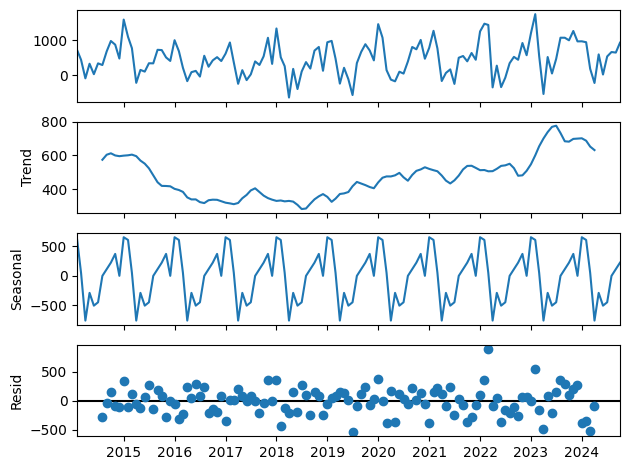

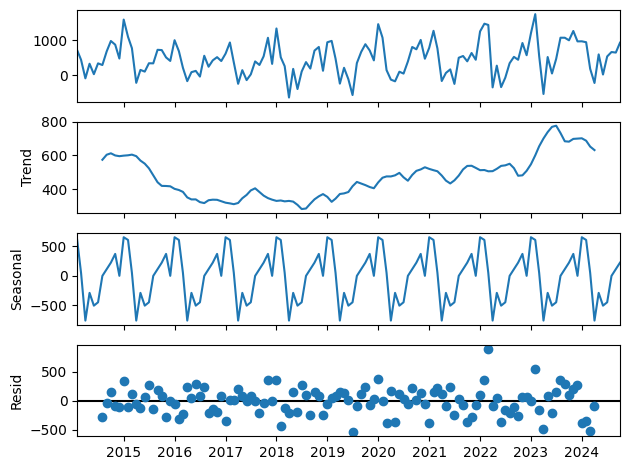

In [23]:
df_grouped = df.groupby(['pays', 'date']).sum().reset_index()

# Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

df_grouped = df_grouped[df_grouped['pays'] == 'France']

df_grouped = df_grouped.set_index('date')
df_grouped = df_grouped[['entree_mensuelle']]

result = seasonal_decompose(df_grouped, model='additive', period=12)
result.plot()

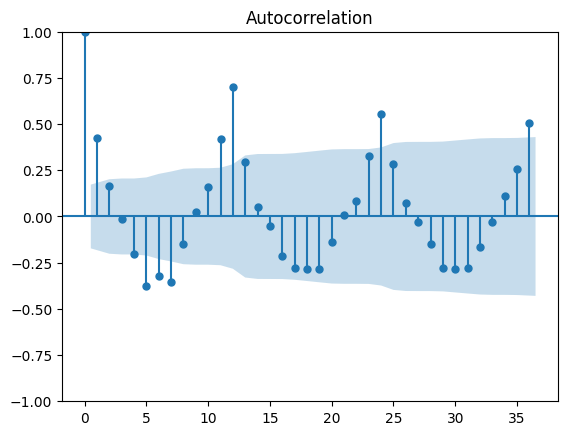

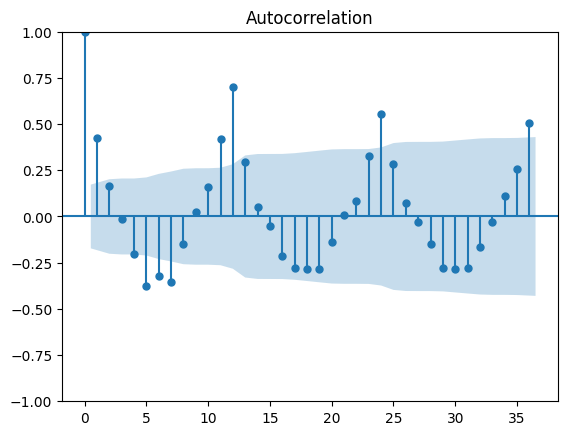

In [24]:
# Auto Correlation
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df_grouped['entree_mensuelle'], lags=36)

In [25]:
import pandas as pd
import plotly.express as px

# Lire le fichier CSV dans un DataFrame
df = pd.read_csv('dataset_reformate2.csv')

# Filtrer les lignes où la colonne 'pays' contient le mot 'Total'
df_filtered = df[~df['pays'].str.contains('Total')]

# Calculer la moyenne de 'nombre_total' pour chaque 'pays' pour toutes les dates
df_mean = df_filtered.groupby('pays')['nombre_total'].mean().reset_index()

# Créer la carte choroplèthe avec la moyenne
fig = px.choropleth(df_mean,
                    locations='pays',
                    locationmode='country names',
                    color='nombre_total',
                    hover_name='pays',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Moyenne du nombre total d'immigrés par pays pour toutes les dates")

# Afficher la carte
fig.show()

/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/ImmigrationProject_Python/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/ImmigrationProject_Python/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/ImmigrationProject_Python/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



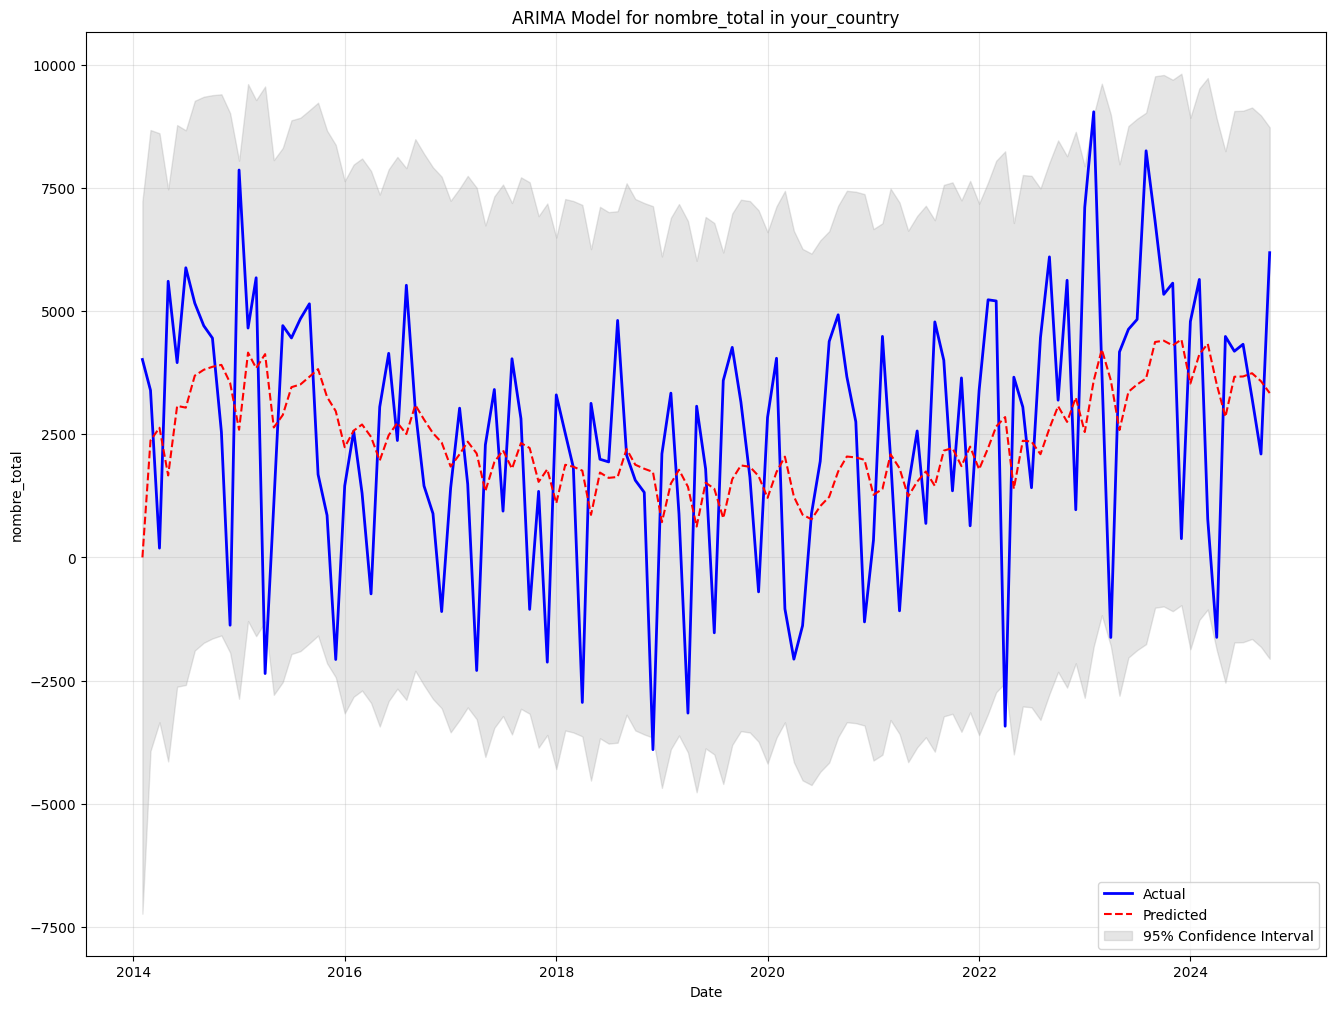

In [26]:
# ARIMA
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("dataset_reformate.csv") 
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])
df_country = df[df['pays'] == 'Total Europe']
# Set 'date' as index
df_country = df_country.set_index('date')
# Select the relevant column for ARIMA modeling ('nombre_total' in this case)
data = df_country['entree_mensuelle']

# Fit the ARIMA model (you'll need to determine the appropriate p, d, q values)
# Example: ARIMA(p=5, d=1, q=0) 
model = ARIMA(data, order=(1,1,1)) 
model_fit = model.fit()

# Get predictions and confidence intervals
pred = model_fit.get_prediction(start=0, end=len(data) - 1)
pred_ci = pred.conf_int()

# Plot the data and predictions
plt.figure(figsize=(16, 12))
plt.plot(data.index, data, label='Actual', color='blue', linewidth=2)
plt.plot(pred.predicted_mean.index, pred.predicted_mean, label='Predicted', color='red', linestyle='--')
plt.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1],
                 color='gray',
                 alpha=.2, 
                 label='95% Confidence Interval')

plt.title(f'ARIMA Model for nombre_total in your_country')
plt.xlabel('Date')
plt.ylabel('nombre_total')
plt.legend()
#plt.ylim(1700000,2100000)
plt.grid(alpha=0.3)
#plt.xlim("2008-03-01",)
plt.show()

/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/ImmigrationProject_Python/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/ImmigrationProject_Python/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/ImmigrationProject_Python/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/ImmigrationProject_Python/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will 

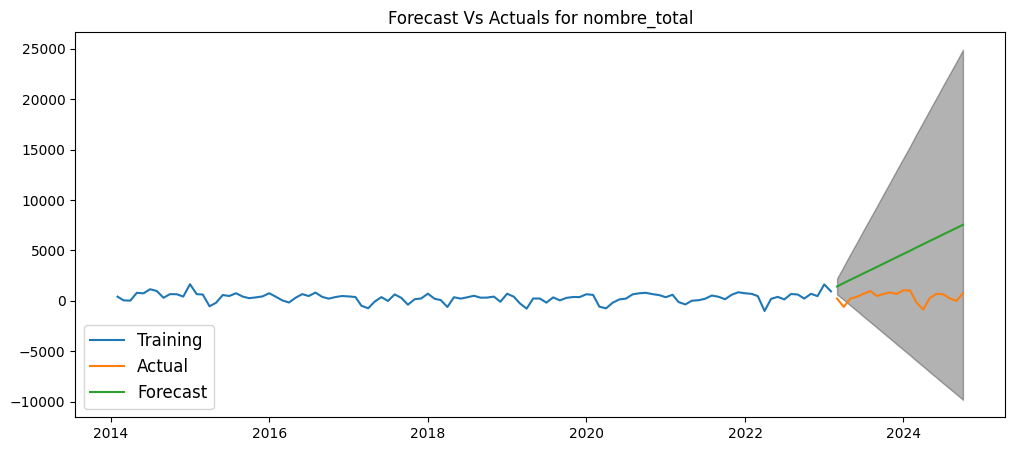

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1928.628, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1948.006, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1928.887, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1926.814, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2002.198, Time=0.00 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1928.096, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1930.465, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1959.222, Time=0.01 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.162 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  129
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -960.407
Date:                Thu, 05 Dec 2024   AIC                           1926.814
Time:                        12:39:4

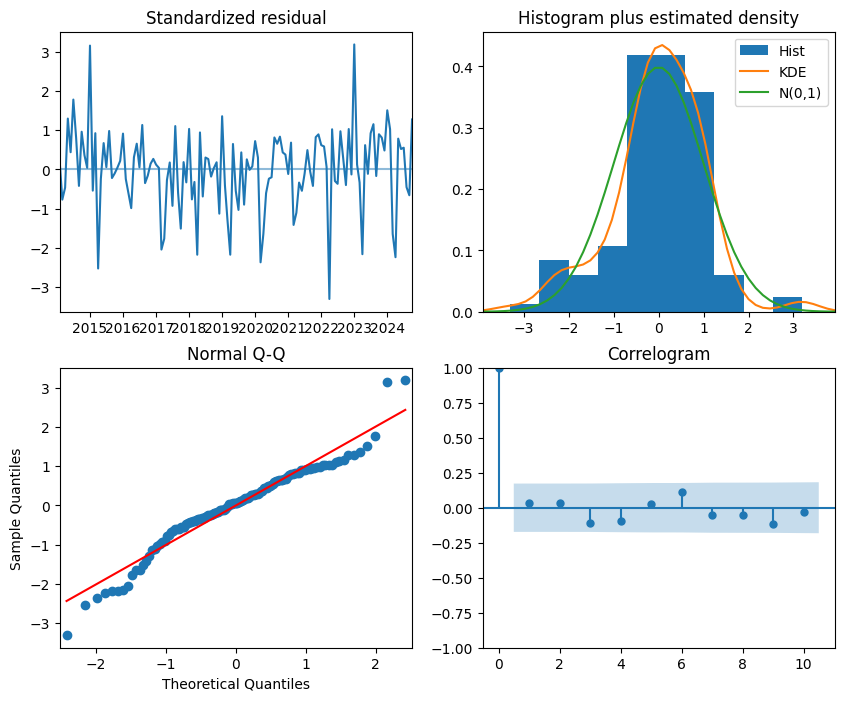

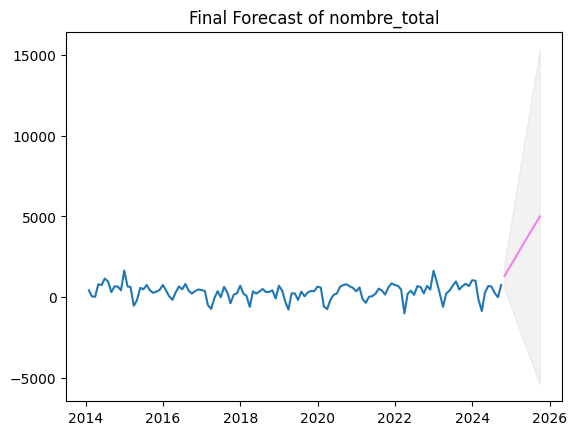

In [27]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pmdarima as pm
import numpy as np

# Load your dataset
df = pd.read_csv("dataset_reformate.csv") 

# Convert 'date' to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

df_country = df[df['pays'] == 'Italie']

# Select the relevant column for ARIMA modeling ('nombre_total' in this case)
data = df_country['entree_mensuelle']

# Split data into train and test sets (adjust split point as needed)
train = data[:-20]  # Example: keep the last 96 points for testing
test = data[-20:]

# Function to plot forecast
def plot_forecast(test, train, alphaval, titleval):
    model = ARIMA(train, order=(2, 0, 0))  # You might need to adjust the order
    fitted = model.fit()
    
    # Get the forecast
    fc = fitted.forecast(len(test), alpha=alphaval)

    # Since fc is now a series, we extract the values
    fc_series = pd.Series(fc.values, index=test.index)  
    
    # Get confidence intervals
    conf = fitted.get_forecast(steps=len(test)).conf_int(alpha=alphaval) 
    lower_series = pd.Series(conf.iloc[:, 0], index=test.index)  
    upper_series = pd.Series(conf.iloc[:, 1], index=test.index)  

    # Adjust predictions for differencing (cumulative sum)
    fc_series_adjusted = fc_series.cumsum() + train[-1]
    lower_series_adjusted = lower_series.cumsum() + train[-1]
    upper_series_adjusted = upper_series.cumsum() + train[-1]
    
    # Plot
    plt.figure(figsize=(12, 5), dpi=100)
    plt.plot(train, label='Training')
    plt.plot(test, label='Actual')
    plt.plot(fc_series_adjusted, label='Forecast')
    plt.fill_between(lower_series_adjusted.index, lower_series_adjusted, upper_series_adjusted, 
                     color='k', alpha=.30)
    plt.title(titleval)
    plt.legend(loc='lower left', fontsize=12)
    plt.show()

# Plot the forecast
plot_forecast(test, train, 0.05, 'Forecast Vs Actuals for nombre_total')


# Auto ARIMA 
model = pm.auto_arima(data,
                      start_p=1,
                      start_q=1,
                      test='adf',
                      max_p=20,
                      max_q=20,
                      m=1,
                      d=None,
                      seasonal=True,
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model.summary())

# Plot diagnostics
model.plot_diagnostics(figsize=(10, 8))
plt.show()

# Final forecast 
n_periods = 12 
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)

# Generate correct forecast dates
forecast_dates = pd.date_range(start=data.index[-1], periods=n_periods+1, freq='MS')[1:]

fc_series = pd.Series(fc, index=forecast_dates)
lower_series = pd.Series(confint[:, 0], index=forecast_dates)
upper_series = pd.Series(confint[:, 1], index=forecast_dates)

# Adjust predictions for differencing (cumulative sum)
fc_series_adjusted = fc_series.cumsum() + data.iloc[-1] 
lower_series_adjusted = lower_series.cumsum() + data.iloc[-1]
upper_series_adjusted = upper_series.cumsum() + data.iloc[-1]

plt.plot(data)
plt.plot(fc_series_adjusted, color='violet')
plt.fill_between(lower_series_adjusted.index,
                 lower_series_adjusted,
                 upper_series_adjusted,
                 color='k',
                 alpha=.05)
plt.title("Final Forecast of nombre_total")
plt.show()